In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequality/winequality-red.csv


In [6]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df1 = pd.read_csv("/kaggle/input/winequality/winequality-red.csv")

In [10]:
df=df1


In [11]:
df['Best Quality']=[1 if x>=7 else 0 for x in df['quality']]

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Best Quality          1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [14]:
df['Best Quality'].value_counts()

0    1382
1     217
Name: Best Quality, dtype: int64

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Best Quality            0
dtype: int64

In [16]:
df.shape

(1599, 13)

In [17]:
df.duplicated().sum()

240

Duplicate data will be drop


In [18]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [19]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Visualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Best Quality'],
      dtype='object')

### Biveriant Analysis



<AxesSubplot:xlabel='Best Quality', ylabel='alcohol'>

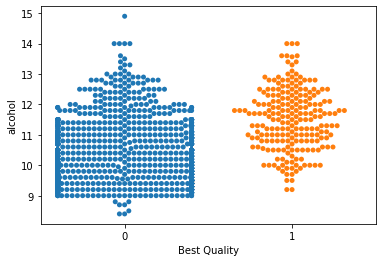

In [23]:
sns.swarmplot(y='alcohol',x='Best Quality',data=df)

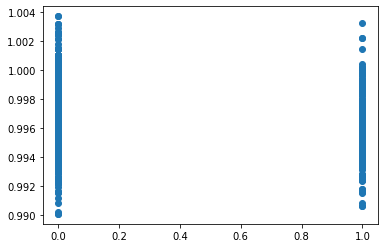

In [24]:
plt.scatter(y='density',x='Best Quality',data=df)

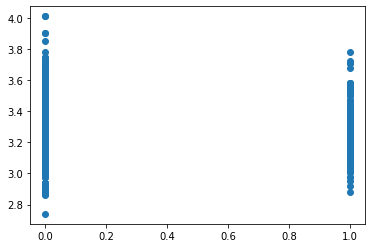

In [25]:
plt.scatter(y='pH',x='Best Quality',data=df)

#### This chart shows fixed acidity is linearly in relation with density



<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

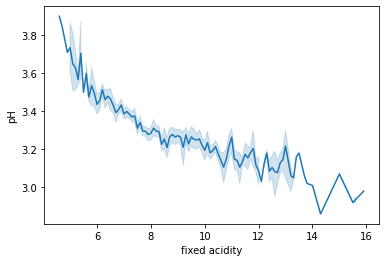

In [26]:
sns.lineplot(x='fixed acidity',y='pH',data=df)

#### this indicate fixed acidity is linearly in negative relation with pH.



### Univariate Analysis

fixed acidity              AxesSubplot(0.125,0.125;0.0503247x0.755)
volatile acidity         AxesSubplot(0.18539,0.125;0.0503247x0.755)
citric acid             AxesSubplot(0.245779,0.125;0.0503247x0.755)
residual sugar          AxesSubplot(0.306169,0.125;0.0503247x0.755)
chlorides               AxesSubplot(0.366558,0.125;0.0503247x0.755)
free sulfur dioxide     AxesSubplot(0.426948,0.125;0.0503247x0.755)
total sulfur dioxide    AxesSubplot(0.487338,0.125;0.0503247x0.755)
density                 AxesSubplot(0.547727,0.125;0.0503247x0.755)
pH                      AxesSubplot(0.608117,0.125;0.0503247x0.755)
sulphates               AxesSubplot(0.668506,0.125;0.0503247x0.755)
alcohol                 AxesSubplot(0.728896,0.125;0.0503247x0.755)
quality                 AxesSubplot(0.789286,0.125;0.0503247x0.755)
Best Quality            AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

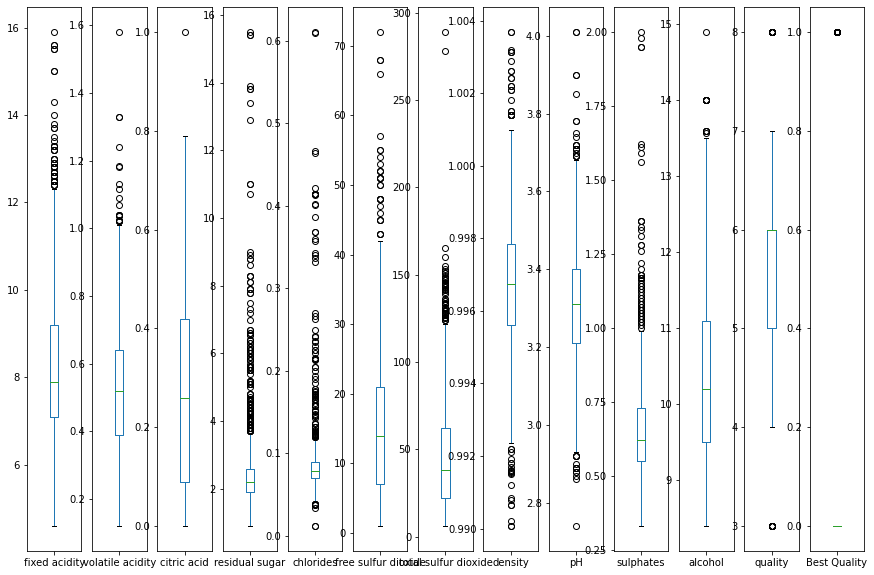

In [27]:
df.plot(kind='box',subplots=True,figsize=(15,10))

### This Chart shows outliers are present in data we will remove outliers in data cleaning part


In [28]:
import seaborn as sns

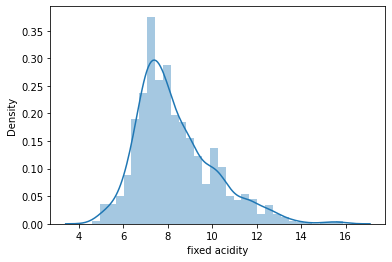

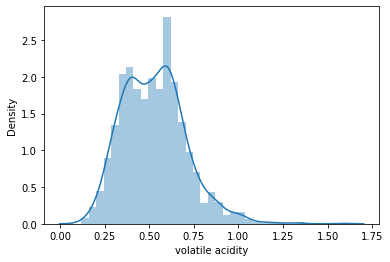

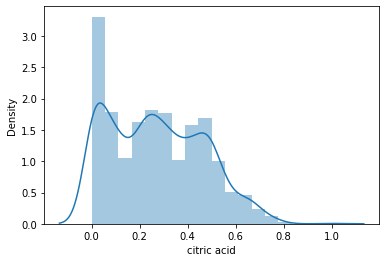

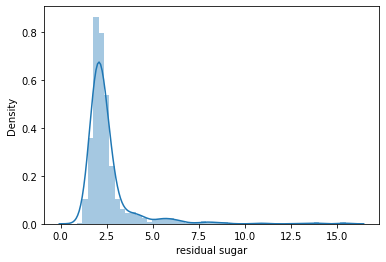

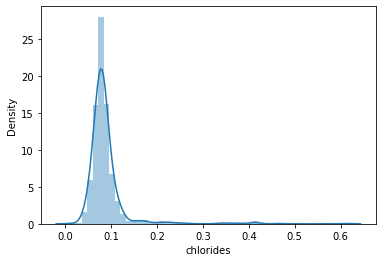

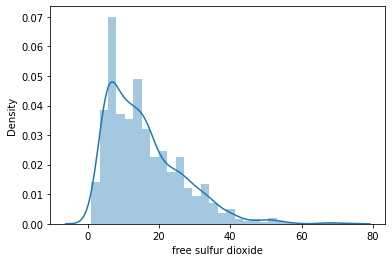

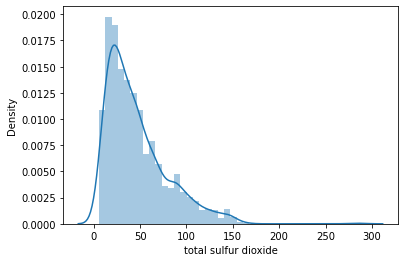

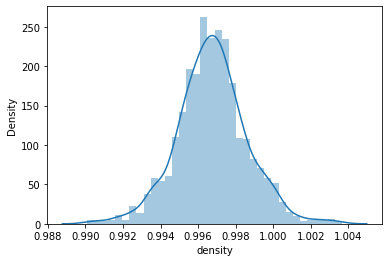

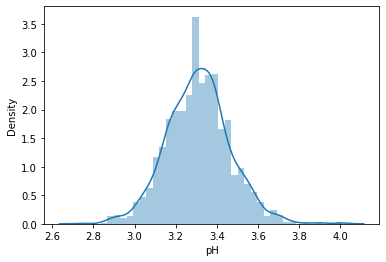

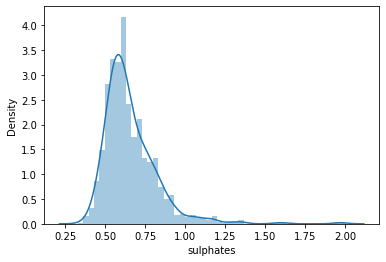

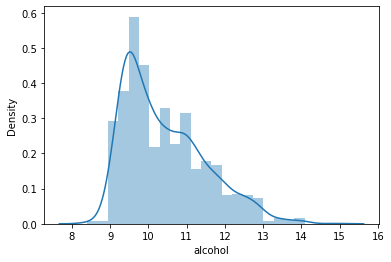

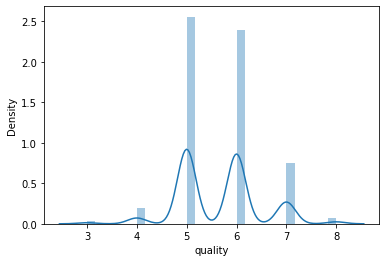

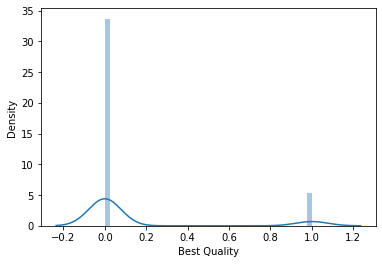

In [29]:
for i in df.columns:
    sns.distplot(df[i])
    plt.subplot(111)
    plt.show()

##### this data show that some features have skewness that will be removed in data cleaning part.



### Statastical

In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


#### This data shows some outliers are present in dataset & from mean of this that we can say that skewness is present in some features.



In [31]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


<AxesSubplot:>

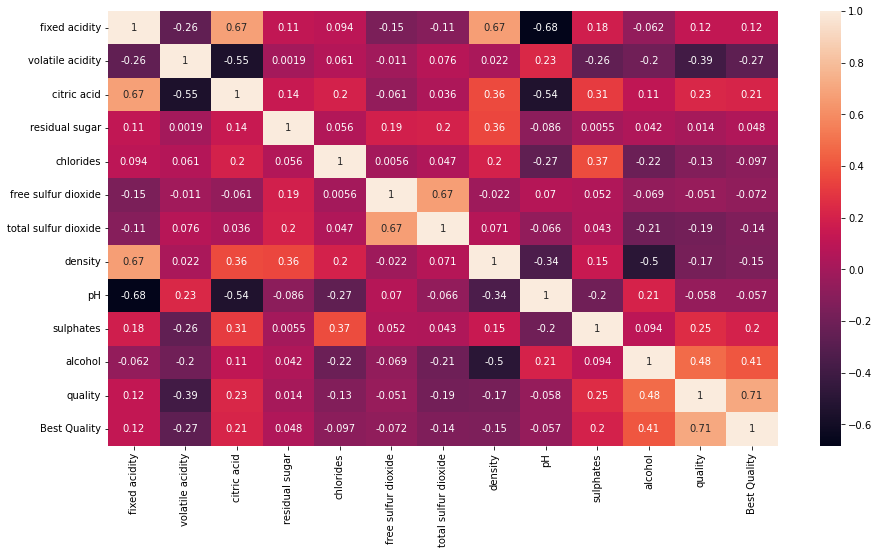

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

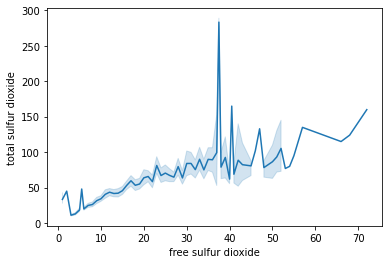

In [33]:
sns.lineplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df)

### Data Cleaning

volatile acidity having negative relation with quality so we will drop it



In [34]:
df.drop('volatile acidity',axis=1)

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### Outlier detection

In [36]:
from scipy.stats import zscore
import numpy as np

In [37]:
z=abs(zscore(df))

In [38]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new.shape

(1451, 13)

In [43]:
df=df_new

In [44]:
df.shape

(1451, 13)

In [45]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


#### Skewness Remove: set(0.5 to -0.5)



In [46]:
df.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
Best Quality            2.094941
dtype: float64

In [47]:
df['residual sugar']=np.sqrt(df['residual sugar'])
df['total sulfur dioxide']=np.sqrt(df['total sulfur dioxide'])
df['sulphates']=np.sqrt(df['sulphates'])
df['alcohol']=np.sqrt(df['alcohol'])
df['fixed acidity']=np.sqrt(df['fixed acidity'])
df['chlorides']=np.sqrt(df['chlorides'])

In [48]:
x=df.iloc[:,:-2]
x.shape

(1451, 11)

In [49]:
y=df.iloc[:,-1]
y.shape

(1451,)

In [50]:
y.value_counts()

0    1250
1     201
Name: Best Quality, dtype: int64

## SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smt=SMOTE()

In [53]:
trainx,trainy=smt.fit_resample(x,y)

In [54]:
trainy

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Best Quality, Length: 2500, dtype: int64

In [55]:
trainy.value_counts()

0    1250
1    1250
Name: Best Quality, dtype: int64

In [56]:
x=trainx
y=trainy

#### Scaling The Data

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std=StandardScaler()

In [59]:
x1=std.fit_transform(x)
x1

array([[-0.68798169,  1.41235862, -1.6661992 , ...,  1.55136875,
        -0.96563394, -1.41834846],
       [-0.42509598,  2.51042687, -1.6661992 , ..., -0.75076645,
        -0.00674633, -1.01612228],
       [-0.42509598,  1.77838137, -1.4540908 , ..., -0.30519189,
        -0.23795822, -1.01612228],
       ...,
       [ 0.90152421,  0.17389776,  1.03745651, ..., -0.77416414,
         0.42395454,  1.4202037 ],
       [ 0.7983063 , -0.87451411,  0.40185773, ..., -0.96310007,
        -0.98753448,  0.55025692],
       [ 0.00704326, -0.85351976,  0.5989167 , ...,  0.41576115,
         0.70833178,  1.36692478]])

In [60]:
x=x1
x

array([[-0.68798169,  1.41235862, -1.6661992 , ...,  1.55136875,
        -0.96563394, -1.41834846],
       [-0.42509598,  2.51042687, -1.6661992 , ..., -0.75076645,
        -0.00674633, -1.01612228],
       [-0.42509598,  1.77838137, -1.4540908 , ..., -0.30519189,
        -0.23795822, -1.01612228],
       ...,
       [ 0.90152421,  0.17389776,  1.03745651, ..., -0.77416414,
         0.42395454,  1.4202037 ],
       [ 0.7983063 , -0.87451411,  0.40185773, ..., -0.96310007,
        -0.98753448,  0.55025692],
       [ 0.00704326, -0.85351976,  0.5989167 , ...,  0.41576115,
         0.70833178,  1.36692478]])

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [62]:
svc=SVC()

In [63]:

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    svc.fit(x_train,y_train)
    pred_test=svc.predict(x_test)
    pred_train=svc.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,2)==round(accuracy_score(y_train,pred_train)*100,2):
        print('Random state',i,'Score is well')
        print('test accuracy score',accuracy_score(y_test,pred_test)*100)
        print('train accuracy score',accuracy_score(y_train,pred_train)*100)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

In [65]:
x_train.shape

(2000, 11)

In [66]:
y_train.shape

(2000,)

In [67]:
x_test.shape

(500, 11)

In [68]:
y_test.shape

(500,)

## Training the Model

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [75]:
dtc=DecisionTreeClassifier()

In [76]:
param={'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_features':['none','auto','sqrt','log2']}

## Hyperparameter Tuning

In [77]:
gd=GridSearchCV(dtc,param)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_params_)

0.8684
{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [78]:
svc=SVC()
svcp=SVC(kernel='poly')
svcl=SVC(kernel='linear')
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='sqrt')
mnb=MultinomialNB()
knn=KNeighborsClassifier(n_neighbors=5)
lg=LogisticRegression()

In [79]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score\n',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))
    print('f1_score',f1_score(y_test,pred))

In [80]:
fun(svc)

Score 0.917
Accuracy Score
 0.906
Confusion Matrix
 [[230  29]
 [ 18 223]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.89      0.91       259
           1       0.88      0.93      0.90       241

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

f1_score 0.9046653144016227


In [81]:
fun(svcp)

Score 0.89
Accuracy Score
 0.896
Confusion Matrix
 [[226  33]
 [ 19 222]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.87      0.90       259
           1       0.87      0.92      0.90       241

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

f1_score 0.8951612903225806


In [82]:
fun(svcl)

Score 0.837
Accuracy Score
 0.848
Confusion Matrix
 [[215  44]
 [ 32 209]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.83      0.85       259
           1       0.83      0.87      0.85       241

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

f1_score 0.8461538461538461


In [83]:
fun(dtc)

Score 1.0
Accuracy Score
 0.888
Confusion Matrix
 [[232  27]
 [ 29 212]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.90      0.89       259
           1       0.89      0.88      0.88       241

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

f1_score 0.8833333333333333


In [84]:
fun(knn)

Score 0.921
Accuracy Score
 0.892
Confusion Matrix
 [[212  47]
 [  7 234]]
Classification Report               precision    recall  f1-score   support

           0       0.97      0.82      0.89       259
           1       0.83      0.97      0.90       241

    accuracy                           0.89       500
   macro avg       0.90      0.89      0.89       500
weighted avg       0.90      0.89      0.89       500

f1_score 0.8965517241379312


In [85]:
fun(lg)

Score 0.8355
Accuracy Score
 0.856
Confusion Matrix
 [[219  40]
 [ 32 209]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.85      0.86       259
           1       0.84      0.87      0.85       241

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

f1_score 0.8530612244897959


## Ensemble Method

Bagging

In [86]:
from sklearn.model_selection import GridSearchCV


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc=RandomForestClassifier(n_estimators=50,random_state=42)

In [89]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Score',rfc.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,pred))
print('Confusion Matrix\n',confusion_matrix(y_test,pred))
print('Classification Report',classification_report(y_test,pred))
print("f1 score",f1_score(y_test,pred))

Score 1.0
Accuracy Score
 0.946
Confusion Matrix
 [[242  17]
 [ 10 231]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.93      0.95       259
           1       0.93      0.96      0.94       241

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

f1 score 0.9447852760736196


In [90]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [91]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Score',ad.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,predad))
print('Confusion Matrix\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))
print("f1 score",f1_score(y_test,pred))

Score 0.881
Accuracy Score
 0.86
Confusion Matrix
 [[222  37]
 [ 33 208]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.86       259
           1       0.85      0.86      0.86       241

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

f1 score 0.9447852760736196


## Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [93]:
score=cross_val_score(svc,x,y,cv=14)
print(score.mean())

0.8879408520673978


In [94]:
score=cross_val_score(svc,x,y,cv=5)
print(score.mean())

0.8703999999999998


In [95]:
score=cross_val_score(svcp,x,y,cv=14)
print(score.mean())

0.8535268165391824


In [96]:
score=cross_val_score(svcl,x,y,cv=14)
print(score.mean())

0.8259077091385169


In [97]:
score=cross_val_score(dtc,x,y,cv=14)
print(score.mean())

0.8783459024184653


In [98]:
score=cross_val_score(knn,x,y,cv=14)
print(score.mean())

0.875911296035582


In [99]:
score=cross_val_score(rfc,x,y,cv=14)
print(score.mean())

0.9187231543172789


In [100]:
score=cross_val_score(lg,x,y,cv=14)
print(score.mean())

0.8247016150004035


In [101]:
score=cross_val_score(ad,x,y,cv=14)
print(score.mean())

0.8623191979698162


In [102]:
sd=pd.DataFrame({'column name':['svc','svcp','svcl','dtc','knn','rfc','ada','Log']})

In [103]:
sd['score']=[0.92,0.89,0.84,1.0,0.91,1.0,0.89,0.84]
sd['Accuracy Score']=[0.92,0.90,0.86,0.90,0.89,0.94,0.86,0.86]
sd['CV Score']=[0.89,0.85,0.823,0.87,0.87,0.91,0.85,0.83]
sd['F1 Score']=[0.92,0.90,0.86,0.89,0.89,0.93,0.93,0.85]

In [104]:
sd

,column name,score,Accuracy Score,CV Score,F1 Score
0,svc,0.92,0.92,0.890,0.92
1,svcp,0.89,0.90,0.850,0.90
2,svcl,0.84,0.86,0.823,0.86
3,dtc,1.00,0.90,0.870,0.89
4,knn,0.91,0.89,0.870,0.89
5,rfc,1.00,0.94,0.910,0.93
6,ada,0.89,0.86,0.850,0.93
7,Log,0.84,0.86,0.830,0.85


In [105]:
from sklearn.metrics import roc_curve,roc_auc_score

In [106]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)
print('ROC score:',roc_auc_score(y_test,y_pred_prob))

ROC score: 0.9895624729649626


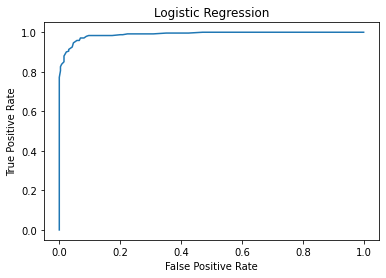

In [107]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [108]:
sd

,column name,score,Accuracy Score,CV Score,F1 Score
0,svc,0.92,0.92,0.890,0.92
1,svcp,0.89,0.90,0.850,0.90
2,svcl,0.84,0.86,0.823,0.86
3,dtc,1.00,0.90,0.870,0.89
4,knn,0.91,0.89,0.870,0.89
5,rfc,1.00,0.94,0.910,0.93
6,ada,0.89,0.86,0.850,0.93
7,Log,0.84,0.86,0.830,0.85


Above Tabel we get best result in rfc=RandomForestClassifier so we save this model



### Saving Model

In [109]:
import pickle
filename='Wine_Quality.pkl'
pickle.dump(rfc,open(filename,'wb'))

## Conclusion

      Actual  Predict
2015       1        1
1987       1        1
2245       1        1
2452       1        1
222        1        0
...      ...      ...
1172       0        0
1973       1        1
1827       1        1
241        1        1
775        0        1

[500 rows x 2 columns]


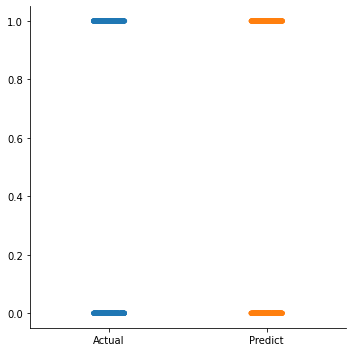

In [110]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
sns.catplot(data=res)